In [ ]:
from xander.engine import dice
from xander.engine.damage import Damage, DamageCause, Fire, Cold

dice.set_seed(0)
damage = Fire("2d6", cause=DamageCause.UNKNOWN)
damage += Cold("12d6", cause=DamageCause.UNKNOWN)
damage

In [ ]:
sgn = lambda x: -1 if x < 0 else 1
def omni_distance(x: int, y: int) -> tuple[int, int, int]:
    c = min(abs(x), abs(y))
    a = sgn(x) * (x - sgn(x) * c)
    b = sgn(y) * (y - sgn(y) * c)

    return (a, b, c)

In [1]:
import typing
from xander.engine.combat.action.attack import Attack
from xander.engine.combat.turn import Turn
from xander.engine.legality import Legality
from xander.engine.combat import Combatant

from random import choice

class RandomAgent:
    combatant: Combatant
    attacks: list[Attack]

    def __init__(self, combatant: Combatant):
        self.combatant = combatant
        self.attacks = [action.as_attack() for action in combatant.stats.actions()]

    def hook(self, turn: Turn) -> "Legality[typing.Any]":
        l_directions = turn.possible_directions()
        
        if l_directions.is_illegal():
            return turn.end()
        
        directions = l_directions.inner()

        if len(directions) == 0:
            return turn.end()

        move = choice(directions)
        print(move)
        return turn.move(move)

class Agent:
    combatant: Combatant
    attacks: list[Attack]

    def __init__(self, combatant: Combatant):
        self.combatant = combatant
        self.attacks = [action.as_attack() for action in combatant.stats.actions()]

    def hook(self, turn: Turn) -> "Legality[typing.Any]":
        to_do = input(f"{self.combatant.name}: _A_ttack / _M_ove / _E_nd: ")

        match to_do:
            case "M":
                x, y, z = map(float, input("Delta: ").split(", "))
                return turn.move((x, y, z))

            case "A":
                x, y, z = map(float, input("Absolute Target: ").split(", "))

                return turn.attack(self.attacks[0], (x, y, z))
                    
            case "E":
                return turn.end()
            
            case "":
                raise Exception()

Hit { attacker: (Weak), attack: Melee(MeleeAttackAction { name: "Bite", description: "", to_hit: Constant(0), range: Reach, target: Single, damage: [(Constant(1), DamageTypeMeta { name: "PIERCING", description: "Puncturing and impaling attacks, including spears and monsters' bites, deal piercing damage.", index: 8 })] }), target: (Weak), to_hit: AttackRoll(Add(Roll([19]), Modifier(0))), damage: Damage([DamagePart { damage_type: DamageTypeMeta { name: "PIERCING", description: "Puncturing and impaling attacks, including spears and monsters' bites, deal piercing damage.", index: 8 }, amount: Modifier(1), cause: DamageCause { actor: Entity((Weak)), source: DamageSource }, handling: DamageHandling { resistance: false, vulnerability: false, immunity: false } }]) }

Combat(2 members)

Arena
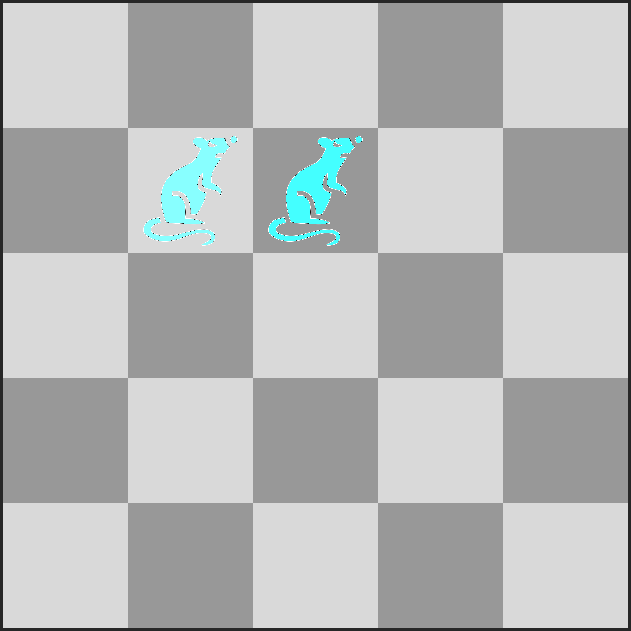

In [3]:
import time
from IPython.display import display, clear_output
from xander.engine import dice
from xander.engine.combat import Combat
from xander.engine.combat.arena import Simple
from xander.engine.actors import Stats


dice.random_seed()
combat = Combat(Simple(25, 25))

ra1 = combat.join(Stats.from_json("../rat.json"), "RA1", (0.0, 0.0, 0.0))
user = Agent(ra1)
combat.set_combatant_hook(user.combatant, hook=user.hook)

ra2 = combat.join(Stats.from_json("../rat.json"), "RA2", (5.0, 0.0, 0.0))
bot = RandomAgent(ra2)
combat.set_combatant_hook(bot.combatant, hook=bot.hook)

display(combat)
display(combat.arena)
l: "Legality[typing.Any] | None" = None
while not (ra1.stats.dead or ra2.stats.dead):
    if combat.current.name == user.combatant.name:
        clear_output()
        display(l)
        display(combat)
        display(combat.arena)
        time.sleep(0.1)

    l = combat.step()
    
clear_output()
display(l)
display(combat)
display(combat.arena)


In [3]:
bot.combatant.position

(25.0, 10.0, 0.0)